In [1]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("mini-project-III/twm_accounts.csv",sep=';')

In [3]:
df.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [4]:
cust = pd.read_csv("mini-project-III/twm_customer.csv",sep=';')

In [5]:
cust.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [6]:
cust['gender'] = cust['gender'].replace(['F ','M '],[0,1])

In [7]:
new_cust = cust.iloc[:,1:5]

In [8]:
new_cust.head()

,income,age,years_with_bank,nbr_children
0,26150,46,5,1
1,6605,71,1,0
2,18548,38,8,0
3,47668,54,3,0
4,44554,59,9,2


In [9]:
fig = px.scatter_matrix(
    new_cust,
    dimensions=["income","age"],
    color = 'gender')
fig.update_traces(diagonal_visible=False)
fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['income', 'age', 'years_with_bank', 'nbr_children'] but received: gender

In [19]:
scaler = StandardScaler()
cust_scaled = pd.DataFrame(scaler.fit_transform(new_cust.astype(float)))

In [20]:
cust_scaled.columns = ['income','age','years_with_bank','nbr_children']
cust_scaled['gender'] = cust['gender']
cust_scaled['marital_status'] = cust['marital_status']

In [21]:
cust_scaled.head()

,income,age,years_with_bank,nbr_children,gender,marital_status
0,0.154185,0.184312,0.408539,0.258591,1,2
1,-0.726524,1.493070,-1.087435,-0.648298,1,2
2,-0.188366,-0.234490,1.530520,-0.648298,0,1
3,1.123798,0.603115,-0.339448,-0.648298,0,1
4,0.983479,0.864867,1.904514,1.165479,0,4


In [22]:
km = KMeans(n_clusters=5,
            n_init=10,
            random_state=0)

In [23]:
y_km = km.fit_predict(cust_scaled)

In [24]:
y_km

array([2, 4, 2, 4, 2, 3, 1, 2, 3, 2, 2, 1, 4, 1, 3, 1, 3, 1, 2, 1, 4, 4,
       0, 2, 3, 4, 1, 2, 2, 4, 4, 0, 3, 2, 4, 3, 1, 4, 2, 1, 1, 3, 4, 3,
       4, 4, 4, 3, 3, 0, 1, 1, 0, 2, 2, 4, 4, 2, 0, 2, 3, 1, 1, 4, 0, 1,
       2, 3, 1, 1, 4, 3, 2, 4, 2, 2, 1, 4, 1, 1, 0, 2, 4, 1, 2, 3, 4, 4,
       0, 2, 3, 1, 1, 4, 1, 4, 1, 4, 4, 3, 2, 2, 3, 4, 3, 4, 0, 2, 0, 2,
       1, 2, 2, 4, 3, 3, 3, 4, 0, 3, 0, 3, 2, 3, 1, 2, 1, 4, 3, 1, 2, 4,
       1, 4, 2, 1, 2, 3, 1, 0, 0, 0, 3, 1, 2, 1, 2, 2, 4, 0, 1, 4, 4, 0,
       4, 2, 4, 2, 3, 2, 2, 0, 1, 3, 3, 3, 4, 1, 4, 2, 4, 2, 2, 4, 4, 1,
       2, 0, 2, 4, 1, 1, 2, 1, 0, 4, 4, 3, 2, 3, 4, 3, 1, 1, 3, 1, 1, 1,
       3, 3, 2, 2, 1, 1, 4, 2, 3, 4, 1, 2, 1, 1, 0, 2, 1, 3, 1, 3, 4, 3,
       2, 3, 3, 3, 1, 3, 4, 4, 3, 1, 1, 1, 1, 1, 1, 1, 0, 3, 2, 2, 3, 1,
       4, 2, 4, 0, 0, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 4, 4, 4, 3, 2, 3, 3,
       1, 1, 4, 1, 3, 3, 3, 1, 1, 1, 2, 3, 4, 4, 4, 1, 1, 2, 2, 3, 3, 1,
       1, 3, 3, 1, 1, 3, 3, 4, 0, 1, 4, 2, 1, 1, 1,

In [25]:
df = cust_scaled
df['y'] = y_km

In [26]:
df = df.groupby('y').mean()

In [27]:
df

,income,age,years_with_bank,nbr_children,gender,marital_status
y,,,,,,
0,2.222161,0.383991,0.050574,0.090169,0.657143,2.100000
1,-0.745959,-1.202313,-0.187219,-0.593611,0.447236,1.125628
2,-0.041220,0.808662,1.161115,-0.325601,0.411043,1.926380
3,0.178823,-0.279362,-0.251176,1.537248,0.397516,2.701863
4,-0.189462,0.815236,-0.747441,-0.536409,0.409091,1.857143


In [28]:
df = df.transpose().reset_index()

In [29]:
df

y,index,0,1,2,3,4
0,income,2.222161,-0.745959,-0.041220,0.178823,-0.189462
1,age,0.383991,-1.202313,0.808662,-0.279362,0.815236
2,years_with_bank,0.050574,-0.187219,1.161115,-0.251176,-0.747441
3,nbr_children,0.090169,-0.593611,-0.325601,1.537248,-0.536409
4,gender,0.657143,0.447236,0.411043,0.397516,0.409091
5,marital_status,2.100000,1.125628,1.926380,2.701863,1.857143


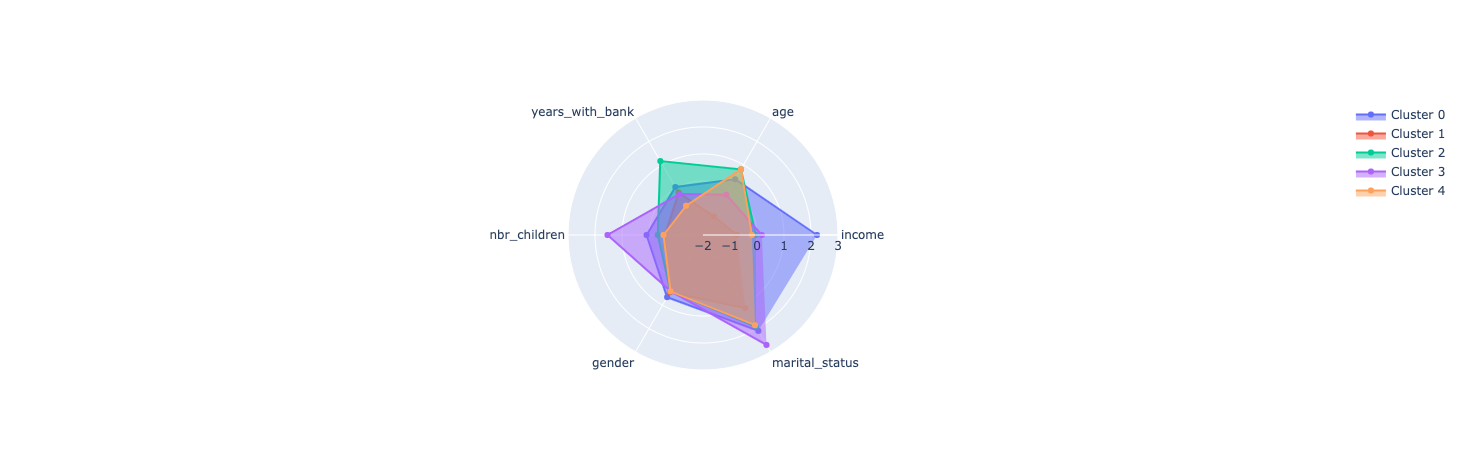

In [35]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=df[0], theta=df['index'], fill='toself', name='Cluster 0'))
fig.add_trace(go.Scatterpolar(r=df[1], theta=df['index'], fill='toself', name='Cluster 1'))
fig.add_trace(go.Scatterpolar(r=df[2], theta=df['index'], fill='toself', name='Cluster 2'))
fig.add_trace(go.Scatterpolar(r=df[3], theta=df['index'], fill='toself', name='Cluster 3'))
fig.add_trace(go.Scatterpolar(r=df[4], theta=df['index'], fill='toself', name='Cluster 4'))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2, 3]
    )),
  showlegend=True
)

fig.show()

In [48]:
cust_scaled

,income,age,years_with_bank,nbr_children,gender,marital_status,y
0,0.154185,0.184312,0.408539,0.258591,1,2,2
1,-0.726524,1.493070,-1.087435,-0.648298,1,2,4
2,-0.188366,-0.234490,1.530520,-0.648298,0,1,2
3,1.123798,0.603115,-0.339448,-0.648298,0,1,4
4,0.983479,0.864867,1.904514,1.165479,0,4,2
...,...,...,...,...,...,...,...
742,-0.357478,-0.339191,0.782533,0.258591,0,4,3
743,0.164864,0.707816,0.782533,0.258591,1,2,2
744,1.738064,0.393714,-1.461429,1.165479,1,2,0
745,-0.343735,-0.286841,1.156526,-0.648298,0,2,2


In [49]:
from sklearn.decomposition import PCA

In [50]:
reduced_data = PCA(n_components=2).fit_transform(cust_scaled)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

In [51]:
results

,pca1,pca2
0,-0.018848,0.508592
1,2.008032,-1.399012
2,-0.963989,-0.226735
3,1.274506,-0.520093
4,1.039787,2.653551
...,...,...
742,1.210682,0.440222
743,0.130875,0.733473
744,-0.885420,2.135821
745,-0.575422,-0.111313


In [1]:
# PCA plot, no cluster colours

# fig = go.Figure()

# # Add traces
# fig.add_trace(go.Scatter(x=results['pca1'], y=results['pca2'],
#                     mode='markers',
#                     name='markers'))

# fig.show()

In [58]:
cust_scaled

,income,age,years_with_bank,nbr_children,gender,marital_status,y
0,0.154185,0.184312,0.408539,0.258591,1,2,2
1,-0.726524,1.493070,-1.087435,-0.648298,1,2,4
2,-0.188366,-0.234490,1.530520,-0.648298,0,1,2
3,1.123798,0.603115,-0.339448,-0.648298,0,1,4
4,0.983479,0.864867,1.904514,1.165479,0,4,2
...,...,...,...,...,...,...,...
742,-0.357478,-0.339191,0.782533,0.258591,0,4,3
743,0.164864,0.707816,0.782533,0.258591,1,2,2
744,1.738064,0.393714,-1.461429,1.165479,1,2,0
745,-0.343735,-0.286841,1.156526,-0.648298,0,2,2


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
# set figure size
plt.rcParams["figure.figsize"] = (12,8)

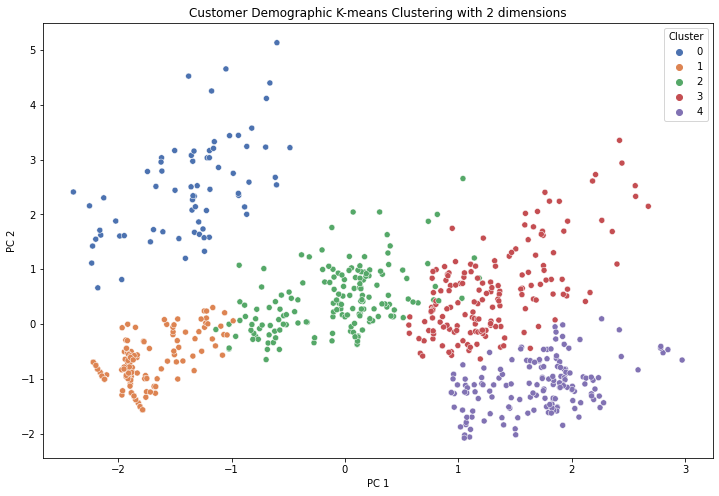

In [65]:
sns.scatterplot(data=results, x="pca1", y="pca2", hue=cust_scaled['y'], palette='deep')
plt.title('Customer Demographic K-means Clustering with 2 dimensions')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(title='Cluster')
plt.show()